# 1주차 스터디 과제

Made by 35기 코딩부장 류제현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 생성과 회귀분석

* 데이터 생성을 이해해보고 직접 만들어보자
* 생성한 데이터의 회귀식을 구해보자


예시: 
$
Y = 2X + 2 \quad (where -3<X<3$)

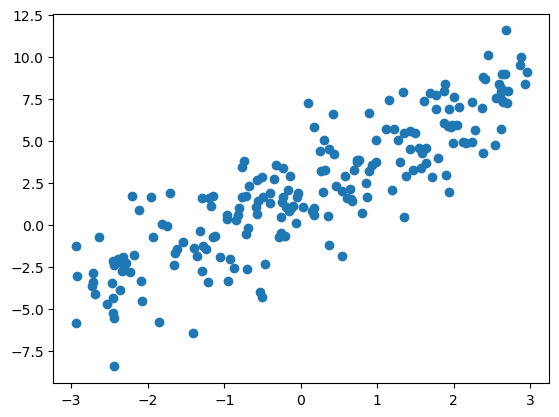

In [8]:
# 몇 개의 데이터를 생성할지 n으로 정한다 (ex. n=100이면 100개의 데이터 생성)
n = 200

# X축의 데이터를 생성한다. np.random.rand은 0과1사이의 랜덤한 값을 리턴한다. 
# -> 여기에 6를 곱하면 0과 6사이의 값으로 변한다(생각해보면 당연함) -> 이 값에다 3를 빼주면 -3와 3사이의 값으로 변한다!
X = 6 * np.random.rand(n,1) - 3

# 각 x값에 해당하는 y값 생성 + 랜덤한 잡음 추가(잡음 앞에 양수를 곱하면 무작위성을 키울 수 있습니다)
y = 2*X + 2 + (2*np.random.randn(n,1))

# 그림으로 그려보자
plt.scatter(X,y);

**연습문제 1**

$
Y = 0.5X^2 + X + 2 
$

위 식을 따르면서, 랜덤한 잡음을 추가한 $-10<X<10$ 데이터를 생성 

잡음에 3을 곱해서 무작위성을 키워주세요!

In [ ]:
# 연습문제 1 풀이
n = 200


**연습문제 2**

연습문제 1에서 생성한 데이터(X,y)를 사용해서 회귀(Regression)를 해보자! 

정규방정식을 풀면 됩니다

* 2차식을 사용한 회귀를 해야함! (힌트: np.c_[np.ones((n,1)), X, X**2])

* $\theta$ 값이 앞서 생성한 데이터와 비슷한 값이 나왔나요?

* 2차 회귀선을 시각화 해봅시다 (어려울 수 있음)

In [ ]:
#  연습문제 2 풀이


In [ ]:
# 연습문제 2 시각화


**연습문제 3**

싸이킷런을 사용해 연습문제 1에서 생성한 데이터(X,y)를 회귀 해보자

힌트) 싸이킷런은 절편을 자동으로 추가 해주기 때문에, np.c_[X,X**2] 를 사용합니다!

In [ ]:
# 연습문제 3 풀이

